# Introduction

## Purpose of the Notebook

This Jupyter notebook is designed to demonstrate the application of K-Means clustering on a music dataset from Spotify. Our primary objective is to explore how songs can be grouped based on various musical features such as danceability, energy, loudness, and tempo. The analysis aims to uncover intrinsic patterns within the data, which could provide insights into the characteristics of different music genres or help in building music recommendation systems.

## Dataset Description

The dataset used in this analysis is a collection of songs from Spotify, a popular digital music service. Each entry in the dataset represents a song, characterized by several features that describe its musical aspects. Key features include:

**Danceability**: Describes how suitable a track is for dancing.

**Energy**: Represents a perceptual measure of intensity and activity.

**Loudness**: The overall loudness of the track in decibels (dB).

**Valence**: Describes the musical positiveness conveyed by a track.

**Tempo**: The overall estimated tempo of the track in beats per minute (BPM).

Additional features such as **acousticness**, **instrumentalness**, **liveness**, and **speechiness**.

The dataset provides a diverse set of songs, offering a broad view of different music styles and trends.

## Analysis and Clustering Steps

The analysis will proceed through the following steps:

1. Data Preprocessing: We will start by loading the data and performing necessary preprocessing steps such as handling missing values and normalizing data.

2. Exploratory Data Analysis (EDA): This step involves exploring the dataset to understand its distribution and underlying patterns. We will visualize different features to gain insights into the dataset's structure.

3. Feature Selection: We will select relevant features for the clustering process. This decision will be based on the EDA findings and domain knowledge.

4. K-Means Clustering: We will apply the K-Means clustering algorithm to the processed data. The optimal number of clusters will be determined using methods like the Elbow Method.

5. Cluster Analysis: Once the songs are grouped into clusters, we will analyze each cluster to interpret its characteristics and identify any unique trends or patterns.

6. Conclusion: The final step will summarize our findings and discuss potential applications of this analysis.

# Import the libraries and dataset

In [1]:
# import the libraries

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load your data
df = pd.read_csv('../spotify15k.csv')

In [3]:
df.head()

,Unnamed: 0.1,album,artist_name,track_number,id,name,uri,acousticness,danceability,energy,...,liveness,loudness,speechiness,tempo,valence,explicit,mode,popularity,duration_ms,Unnamed: 0
0,0,El Dorado,24kGoldn,1,38mQZ5tZ6IylQaJCCF90ox,The Top,spotify:track:38mQZ5tZ6IylQaJCCF90ox,0.3360,0.754,0.711,...,0.128,-3.842,0.0720,138.031,0.2700,True,0,59,196373,NaN
1,1,Fighting Demons (Deluxe),Juice WRLD,1,1X8E4vVoOM3BpSQlEDSjjM,Burn,spotify:track:1X8E4vVoOM3BpSQlEDSjjM,0.1490,0.354,0.475,...,0.210,-9.333,0.0425,114.975,0.0393,True,0,76,217222,NaN
2,2,El Dorado,24kGoldn,2,3JVTsvTldB6arHVlmxmTnM,Company (feat. Future),spotify:track:3JVTsvTldB6arHVlmxmTnM,0.4470,0.831,0.727,...,0.111,-3.657,0.1690,125.068,0.7030,True,0,71,213080,NaN
3,3,Fighting Demons (Deluxe),Juice WRLD,2,1hB3M3POeKMLxcEFEvPeqU,Already Dead,spotify:track:1hB3M3POeKMLxcEFEvPeqU,0.0216,0.744,0.495,...,0.111,-6.311,0.0634,83.510,0.1280,True,1,77,231221,NaN
4,4,Fighting Demons (Deluxe),Juice WRLD,3,1CfuBY3BDdKpooQ9L5zgUc,Cigarettes,spotify:track:1CfuBY3BDdKpooQ9L5zgUc,0.0306,0.587,0.614,...,0.399,-6.344,0.0435,160.075,0.4510,True,1,79,227527,NaN


# Exploratory Data Analysis

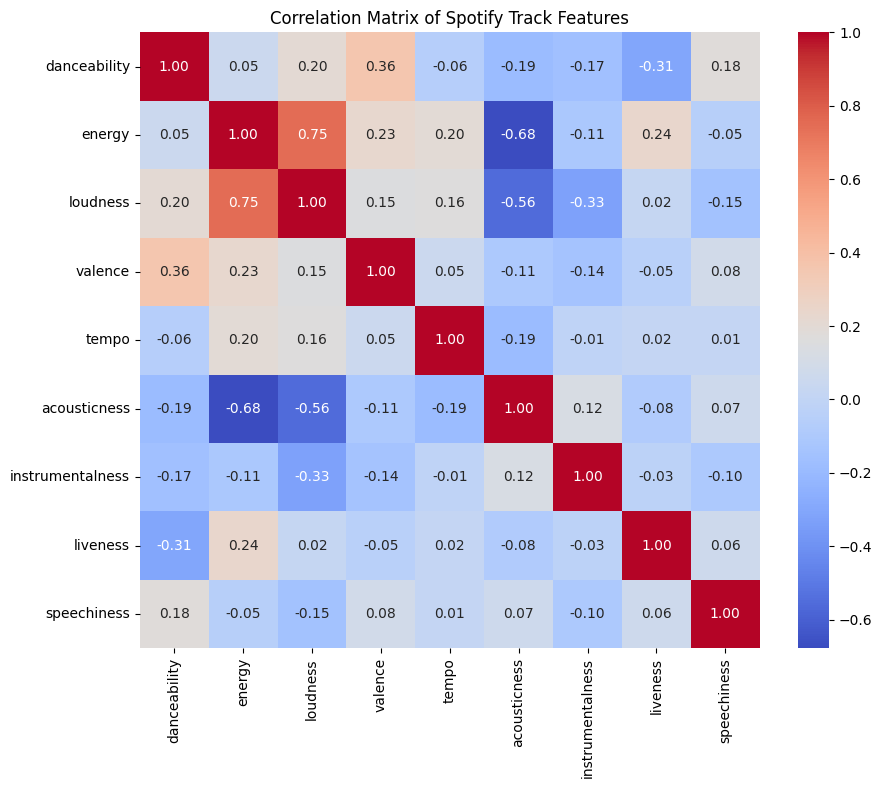

In [4]:
# Selecting the features for correlation analysis
features = ['danceability', 'energy', 'loudness', 'valence', 'tempo', 
            'acousticness', 'instrumentalness', 'liveness', 'speechiness']

# Calculating the correlation matrix
correlation_matrix = df[features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Spotify Track Features")
plt.show()

# Feature Selection

The feature selection step is pivotal in clustering as it directly influences the formation of clusters. Our aim is to choose features that capture the essence of music tracks and can potentially differentiate them into meaningful groups.

## Chosen Features:

**Danceability**, **Energy**, **Valence**, **Tempo**: These features capture the rhythm and mood of a song, crucial for understanding music preferences and genres.

**Loudness**, **Acousticness**: Indicators of the production style and sonic characteristics of music.

**Instrumentalness**, **Liveness**, **Speechiness**: Included to capture a broader range of music characteristics:

- **Instrumentalness**: Helps differentiate instrumental tracks from vocal tracks.

- **Liveness**: Indicates the presence of a live audience in the recording, distinguishing live performances.

- **Speechiness**: Important for identifying tracks with spoken words, like rap or podcasts.

By including features like instrumentalness, liveness, and speechiness, we aim to capture a more comprehensive representation of the music tracks, allowing for a nuanced clustering that can reveal patterns across various musical dimensions.

In [5]:
# Selecting features for clustering
features = ['danceability', 'energy', 'loudness', 'valence', 'tempo', 
            'acousticness', 'instrumentalness', 'liveness', 'speechiness']
clustering_data = df[features]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# K-Means Clustering

Clustering allows us to group songs based on their features, uncovering patterns that might not be immediately apparent.

## Choice of Clustering Algorithm: K-Means

K-Means is chosen for its efficiency and effectiveness, particularly in datasets with distinct, spherical clusters.

It’s ideal for our initial exploratory analysis to identify overarching patterns in the dataset.

## Determining the Number of Clusters

The Elbow Method is utilized to find the optimal number of clusters. This involves calculating the Within-Cluster Sum of Square (WCSS) for a range of cluster numbers and identifying the point where the decrease in WCSS becomes less pronounced.

The optimal number of clusters is inferred from this 'elbow' point, representing a balance between cluster compactness and the number of clusters.

In [6]:
# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

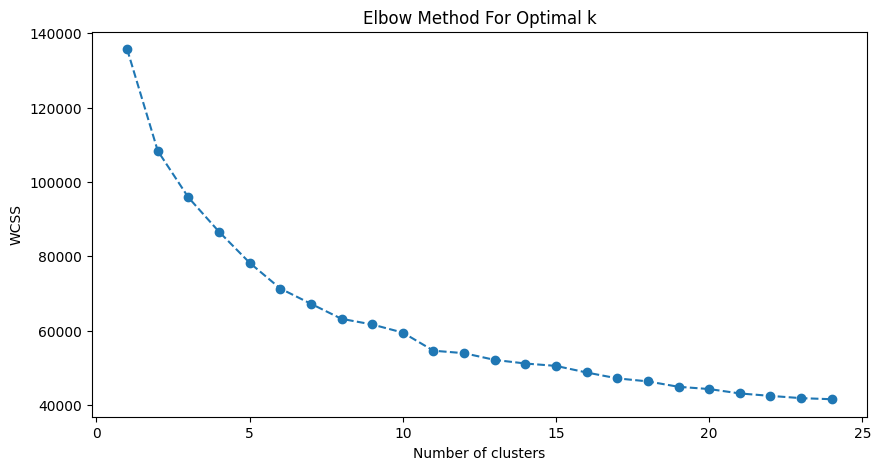

In [7]:
# Plotting the Elbow Method results
plt.figure(figsize=(10, 5))
plt.plot(range(1, 25), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original data
df['cluster'] = kmeans.labels_

# Analyze the centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print(centroids)

   danceability    energy   loudness   valence       tempo  acousticness  \
0      0.503952  0.355070 -11.011319  0.352745  112.103948      0.638572   
1      0.646355  0.719629  -5.891465  0.514943  123.369543      0.119349   
2      0.657874  0.410674 -13.932109  0.512179  113.344209      0.516590   
3      0.482622  0.482209 -13.816104  0.332718  117.470917      0.432935   
4      0.435349  0.819462  -6.408461  0.407314  128.161865      0.112582   

   instrumentalness  liveness  speechiness  
0          0.014998  0.195917     0.056250  
1          0.019170  0.173439     0.104217  
2          0.011971  0.319925     0.630156  
3          0.809768  0.190586     0.062157  
4          0.050127  0.740075     0.098811  


In [9]:
df.head()

,Unnamed: 0.1,album,artist_name,track_number,id,name,uri,acousticness,danceability,energy,...,loudness,speechiness,tempo,valence,explicit,mode,popularity,duration_ms,Unnamed: 0,cluster
0,0,El Dorado,24kGoldn,1,38mQZ5tZ6IylQaJCCF90ox,The Top,spotify:track:38mQZ5tZ6IylQaJCCF90ox,0.3360,0.754,0.711,...,-3.842,0.0720,138.031,0.2700,True,0,59,196373,NaN,1
1,1,Fighting Demons (Deluxe),Juice WRLD,1,1X8E4vVoOM3BpSQlEDSjjM,Burn,spotify:track:1X8E4vVoOM3BpSQlEDSjjM,0.1490,0.354,0.475,...,-9.333,0.0425,114.975,0.0393,True,0,76,217222,NaN,0
2,2,El Dorado,24kGoldn,2,3JVTsvTldB6arHVlmxmTnM,Company (feat. Future),spotify:track:3JVTsvTldB6arHVlmxmTnM,0.4470,0.831,0.727,...,-3.657,0.1690,125.068,0.7030,True,0,71,213080,NaN,1
3,3,Fighting Demons (Deluxe),Juice WRLD,2,1hB3M3POeKMLxcEFEvPeqU,Already Dead,spotify:track:1hB3M3POeKMLxcEFEvPeqU,0.0216,0.744,0.495,...,-6.311,0.0634,83.510,0.1280,True,1,77,231221,NaN,1
4,4,Fighting Demons (Deluxe),Juice WRLD,3,1CfuBY3BDdKpooQ9L5zgUc,Cigarettes,spotify:track:1CfuBY3BDdKpooQ9L5zgUc,0.0306,0.587,0.614,...,-6.344,0.0435,160.075,0.4510,True,1,79,227527,NaN,1


# Findings

The K-Means clustering algorithm has partitioned our dataset into five distinct clusters. Below, we interpret each cluster based on the centroids, which represent the average values of the features for each cluster.

## Cluster 0

**Characteristics**: Moderate danceability, low energy, quieter (low loudness), lower valence, slower tempo, high acousticness, low instrumentalness, low liveness, and low speechiness.

**Interpretation**: This cluster likely represents softer, more acoustic and melodic music. The low energy and loudness, combined with higher acousticness, suggest genres like folk, acoustic, or ballads.

## Cluster 1

**Characteristics**: High danceability, high energy, louder, moderate valence, faster tempo, low acousticness, low instrumentalness, and moderate speechiness.

**Interpretation**: Energetic and danceable tracks, probably from genres like pop, dance, or upbeat electronic music. The higher tempo and loudness indicate lively and vibrant songs.

## Cluster 2

**Characteristics**: High danceability, moderate energy, very quiet, moderate valence, slower tempo, moderate acousticness, low instrumentalness, moderate liveness, and very high speechiness.

**Interpretation**: The standout feature is the high speechiness, suggesting a prevalence of spoken words, such as in rap or hip-hop music. The moderate energy and danceability further support this interpretation.

## Cluster 3:

**Characteristics**: Low danceability, moderate energy and loudness, low valence, moderate tempo, moderate acousticness, very high instrumentalness, low liveness, and low speechiness.

**Interpretation**: Dominated by instrumental music, possibly from genres like jazz, classical, or ambient. The very high instrumentalness with low speechiness indicates a focus on instrumental over vocal content.

## Cluster 4:

**Characteristics**: Low danceability, very high energy, louder, moderate valence, high tempo, low acousticness, moderate instrumentalness, very high liveness, and moderate speechiness.

**Interpretation**: Likely represents live performance recordings, given the very high liveness. The high energy and tempo suggest genres like rock or live electronic music performances.

## Visualization

Visualizations like scatter plots or parallel coordinates can further aid in understanding these clusters. Each visualization will highlight how each cluster differs in terms of the musical features.

In [10]:
# Count the number of songs in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()

# Now, if you want to see the detailed list of songs within each cluster
clusters = {}
for k in range(0, 5):  # Adjust the range based on the number of clusters you have
    clusters[k] = df[df['cluster'] == k]

In [11]:
clusters

{0:        Unnamed: 0.1                     album      artist_name  track_number  \
 1                 1  Fighting Demons (Deluxe)       Juice WRLD             1   
 18               18  Fighting Demons (Deluxe)       Juice WRLD            10   
 26               26  Fighting Demons (Deluxe)       Juice WRLD            15   
 32               32  Fighting Demons (Deluxe)       Juice WRLD            20   
 70               70         Legends Never Die       Juice WRLD             1   
 ...             ...                       ...              ...           ...   
 15013          5166                         8   UnoTheActivist            15   
 15020          5174         For Christ Sake 2  Thouxanbanfauni             5   
 15028          5182         For Christ Sake 2  Thouxanbanfauni            13   
 15034          5188              Limbus Pt. 2   UnoTheActivist             5   
 15071          5227               Whole Thang   UnoTheActivist            13   
 
                       

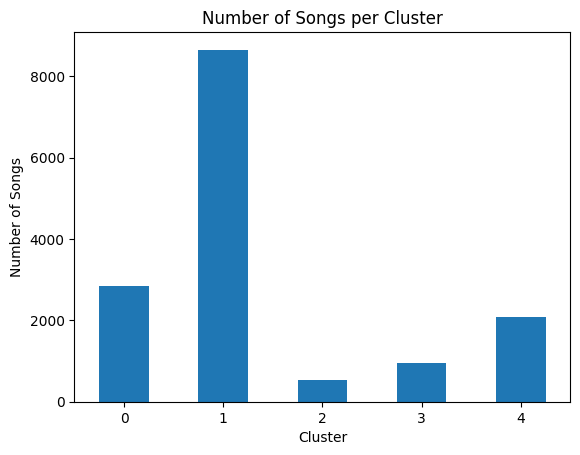

In [12]:
cluster_counts.plot(kind='bar')
plt.title('Number of Songs per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.xticks(range(0, 5), rotation=0)  # Adjust the range based on the number of clusters you have
plt.show()

In [13]:
df[df['cluster'] == 0].head()

,Unnamed: 0.1,album,artist_name,track_number,id,name,uri,acousticness,danceability,energy,...,loudness,speechiness,tempo,valence,explicit,mode,popularity,duration_ms,Unnamed: 0,cluster
1,1,Fighting Demons (Deluxe),Juice WRLD,1,1X8E4vVoOM3BpSQlEDSjjM,Burn,spotify:track:1X8E4vVoOM3BpSQlEDSjjM,0.149,0.354,0.475,...,-9.333,0.0425,114.975,0.0393,True,0,76,217222,NaN,0
18,18,Fighting Demons (Deluxe),Juice WRLD,10,6LhB5o2iWjJgNHqock5H3b,Go Hard 2.0,spotify:track:6LhB5o2iWjJgNHqock5H3b,0.611,0.616,0.463,...,-7.666,0.1800,145.289,0.0682,True,0,73,214728,NaN,0
26,26,Fighting Demons (Deluxe),Juice WRLD,15,1N0TOOPBJvFOvQipTFz5io,Juice WRLD Speaks 2,spotify:track:1N0TOOPBJvFOvQipTFz5io,0.988,0.496,0.280,...,-13.915,0.0951,99.506,0.5190,True,0,62,190998,NaN,0
32,32,Fighting Demons (Deluxe),Juice WRLD,20,6D1KDOoVRKLyGcxVBi13Ot,Go Hard,spotify:track:6D1KDOoVRKLyGcxVBi13Ot,0.625,0.641,0.445,...,-7.940,0.1200,145.302,0.0534,True,0,67,134689,NaN,0
70,70,Legends Never Die,Juice WRLD,1,02XcRGWPkvomFvzTamEKHg,Anxiety - Intro,spotify:track:02XcRGWPkvomFvzTamEKHg,0.972,0.307,0.528,...,-11.337,0.1080,174.795,0.5800,True,0,62,70395,NaN,0


In [14]:
df[df['cluster'] == 1].head()

,Unnamed: 0.1,album,artist_name,track_number,id,name,uri,acousticness,danceability,energy,...,loudness,speechiness,tempo,valence,explicit,mode,popularity,duration_ms,Unnamed: 0,cluster
0,0,El Dorado,24kGoldn,1,38mQZ5tZ6IylQaJCCF90ox,The Top,spotify:track:38mQZ5tZ6IylQaJCCF90ox,0.3360,0.754,0.711,...,-3.842,0.0720,138.031,0.270,True,0,59,196373,NaN,1
2,2,El Dorado,24kGoldn,2,3JVTsvTldB6arHVlmxmTnM,Company (feat. Future),spotify:track:3JVTsvTldB6arHVlmxmTnM,0.4470,0.831,0.727,...,-3.657,0.1690,125.068,0.703,True,0,71,213080,NaN,1
3,3,Fighting Demons (Deluxe),Juice WRLD,2,1hB3M3POeKMLxcEFEvPeqU,Already Dead,spotify:track:1hB3M3POeKMLxcEFEvPeqU,0.0216,0.744,0.495,...,-6.311,0.0634,83.510,0.128,True,1,77,231221,NaN,1
4,4,Fighting Demons (Deluxe),Juice WRLD,3,1CfuBY3BDdKpooQ9L5zgUc,Cigarettes,spotify:track:1CfuBY3BDdKpooQ9L5zgUc,0.0306,0.587,0.614,...,-6.344,0.0435,160.075,0.451,True,1,79,227527,NaN,1
5,5,Fighting Demons (Deluxe),Juice WRLD,4,0veO6y9anwdVTaRuW7y8NJ,You Wouldn't Understand,spotify:track:0veO6y9anwdVTaRuW7y8NJ,0.0012,0.724,0.748,...,-4.335,0.0722,158.040,0.118,True,0,71,170792,NaN,1


In [15]:
df[df['cluster'] == 2].head()

,Unnamed: 0.1,album,artist_name,track_number,id,name,uri,acousticness,danceability,energy,...,loudness,speechiness,tempo,valence,explicit,mode,popularity,duration_ms,Unnamed: 0,cluster
12,12,Fighting Demons (Deluxe),Juice WRLD,7,7n6OIZ0TGJAxgmId9EygTE,Eminem Speaks,spotify:track:7n6OIZ0TGJAxgmId9EygTE,0.936,0.646,0.235,...,-19.697,0.582,128.139,0.624,True,0,63,133251,NaN,2
20,20,Fighting Demons (Deluxe),Juice WRLD,11,5MaFTsKpVo4VHmzXUIdLrj,Juice WRLD Speaks,spotify:track:5MaFTsKpVo4VHmzXUIdLrj,0.852,0.559,0.420,...,-15.124,0.888,71.130,0.799,True,0,61,89310,NaN,2
36,36,DROPPED OUTTA COLLEGE,24kGoldn,9,2ZW6w3NPw4lZf4Li0UBOwL,CITY OF ANGELS - LLusion Funk Remix,spotify:track:2ZW6w3NPw4lZf4Li0UBOwL,0.233,0.856,0.616,...,-5.871,0.571,120.165,0.886,False,0,60,124000,NaN,2
49,49,Thats What They All Say,Jack Harlow,4,4qksq0n5lAvp6dl9M3iXWU,Funny Seeing You Here,spotify:track:4qksq0n5lAvp6dl9M3iXWU,0.468,0.667,0.720,...,-9.079,0.621,80.422,0.458,True,0,63,154062,NaN,2
98,98,Legends Never Die,Juice WRLD,18,4sjdZEEQvR1sXrRNSuBfbA,"The Man, The Myth, The Legend - Interlude",spotify:track:4sjdZEEQvR1sXrRNSuBfbA,0.916,0.667,0.447,...,-14.625,0.761,83.534,0.829,True,1,59,136545,NaN,2


In [16]:
df[df['cluster'] == 3].head()

,Unnamed: 0.1,album,artist_name,track_number,id,name,uri,acousticness,danceability,energy,...,loudness,speechiness,tempo,valence,explicit,mode,popularity,duration_ms,Unnamed: 0,cluster
83,83,Legends Never Die,Juice WRLD,10,2wg81gBz6PZSwbZrXObeW4,Get Through It - Interlude,spotify:track:2wg81gBz6PZSwbZrXObeW4,0.918000,0.3480,0.231,...,-16.230,0.0450,89.098,0.2000,True,1,16,20929,NaN,3
290,290,BADLANDS (Live From Webster Hall),Halsey,7,4hLGqLXIGSsVoR3Sfl8LdW,Colors pt. II - Live From Webster Hall,spotify:track:4hLGqLXIGSsVoR3Sfl8LdW,0.008270,0.4760,0.601,...,-9.085,0.0546,95.165,0.3210,False,1,33,104250,NaN,3
367,367,Japan Calling,Aerosmith,1,6mW6lCoORePaFv4n2LnX7Q,Intro (The Ride Of The Valkyries),spotify:track:6mW6lCoORePaFv4n2LnX7Q,0.196000,0.0787,0.606,...,-15.459,0.1330,177.985,0.0706,False,1,31,206838,NaN,3
368,368,Japan Calling,Aerosmith,2,7vznytaafMlUOFANEKzcBV,Draw The Line,spotify:track:7vznytaafMlUOFANEKzcBV,0.000131,0.3480,0.936,...,-7.625,0.1250,136.152,0.1190,False,1,30,297845,NaN,3
372,372,Japan Calling,Aerosmith,9,16ZD0KYhy4EZahmptifCL2,Drum Solo,spotify:track:16ZD0KYhy4EZahmptifCL2,0.000031,0.3130,0.941,...,-11.146,0.0594,128.625,0.0968,False,1,22,344597,NaN,3


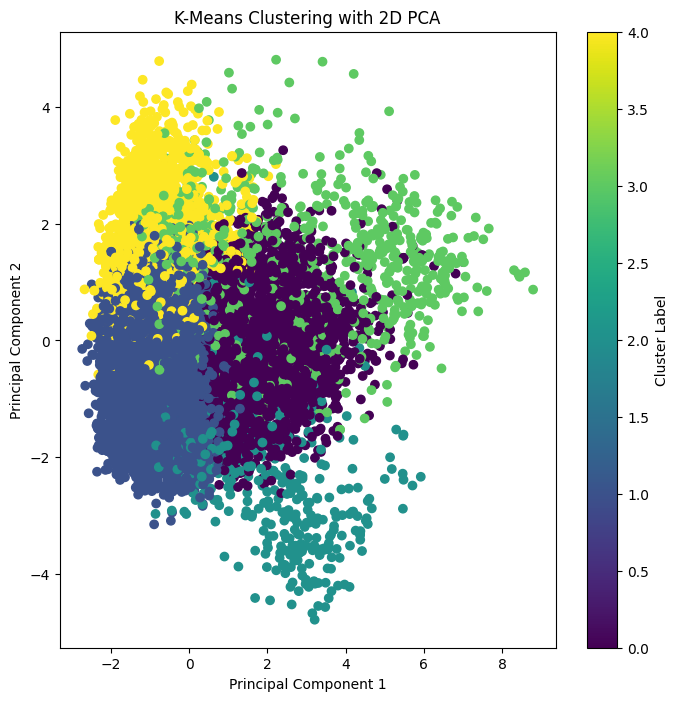

In [17]:
# Apply PCA and reduce the data to two dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Scatter plot for the two principal components by cluster
plt.figure(figsize=(8, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('K-Means Clustering with 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

plt.show()

# Conclusion

This analysis successfully applied K-Means clustering to group songs based on a variety of musical features from the Spotify dataset. The results revealed distinct clusters that suggest different musical styles and characteristics. These findings can be used for music recommendation systems, genre classification, and understanding music preferences.

## Limitations and Further Analysis

**Subjectivity in Interpretation**: The interpretations of clusters are subjective and based on the centroid values. Different perspectives might yield different interpretations.

**Dimensionality**: The high dimensionality of the dataset could hide nuances in lower-dimensional spaces. Techniques like PCA or t-SNE could be explored for more insights.

**Feature Selection**: Further analysis could involve experimenting with different sets of features or exploring hierarchical clustering to understand the dataset's structure at multiple levels.

Overall, this notebook provides a foundational approach to music data analysis, demonstrating the practical application of clustering techniques in understanding complex datasets.